In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [11]:
%autoreload
from pathlib import Path
import sys
root = Path().resolve().absolute().parent.parent
print(root)
sys.path.append(str(root))

from src.pipeline import Pipeline, BuilingIdsEnum
pipe = Pipeline()



/Users/matsalexander/Desktop/SolarEnergyImpact


In [12]:
building_b = pipe.get_data(BuilingIdsEnum.B)
building_c = pipe.get_data(BuilingIdsEnum.C)
# building_a = pipe.get_data(BuilingIdsEnum.A)

# from november 1. to 1. mars only use data from dataset b 
# else use data from dataset c and a

# remove from 2024-01-15 from dataset A
mask_b = (building_b['timestamp'] >= '2024-01-15') & (building_b['timestamp'] <= '2024-01-15')
building_b = building_b[~mask_b]

start_winter = '2023-11-01'
end_winter = '2024-03-01'
mask_b = (building_b['timestamp'] >= start_winter) & (building_b['timestamp'] <= end_winter)
building_b = building_b[mask_b]

mask_c = (building_c['timestamp'] < start_winter) | (building_c['timestamp'] > end_winter)
building_c = building_c[mask_c]

# mask_a = (building_a['timestamp'] < start_winter) | (building_a['timestamp'] > end_winter)


# mask_a = (building_a['timestamp'] >= '2024-07-03') & (building_a['timestamp'] <= '2024-07-07')



# normalize the value_import by area and call it value for main and building_b
building_b['value'] = building_b['value_import'] / building_b['area']
building_c['value'] = building_c['net_consumption'] / building_c['area']


combined_df = pd.concat([ building_b, building_c], ignore_index=True)
# reset index
combined_df = combined_df.reset_index(drop=True)
# Perform the train-test split with stratification based on 'building_id'
train_data, test_data = train_test_split(
    combined_df,
    test_size=0.20,
    random_state=42,
    stratify=combined_df['building']
)

# select features
target = "value"
features = ["timestamp", "temperature", "wind_speed"] #, "cloud_fraction", "precipitation", "area"

train_data = train_data[features + [target]]
test_data = test_data[features + [target]]



In [5]:
# Train the model using AutoGluon
predictor = TabularPredictor(label=target, eval_metric='mean_absolute_error').fit(
    train_data, 
    presets='best_quality',
    excluded_model_types=['KNN']
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20241113_182831"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       14.30 GB / 32.00 GB (44.7%)
Disk Space Avail:   610.55 GB / 926.35 GB (65.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

[1000]	valid_set's l1: 0.00442564
[2000]	valid_set's l1: 0.00413607
[3000]	valid_set's l1: 0.00395387
[4000]	valid_set's l1: 0.00382915
[5000]	valid_set's l1: 0.00373816


	Ran out of time, early stopping on iteration 5479. Best iteration is:
	[5470]	valid_set's l1: 0.00370527


[1000]	valid_set's l1: 0.00417093
[2000]	valid_set's l1: 0.00388662
[3000]	valid_set's l1: 0.00372854
[4000]	valid_set's l1: 0.00364007
[5000]	valid_set's l1: 0.003578


	Ran out of time, early stopping on iteration 5785. Best iteration is:
	[5778]	valid_set's l1: 0.00354292


[1000]	valid_set's l1: 0.00421272
[2000]	valid_set's l1: 0.00396936
[3000]	valid_set's l1: 0.00383724
[4000]	valid_set's l1: 0.00376388
[5000]	valid_set's l1: 0.00370897


	Ran out of time, early stopping on iteration 5928. Best iteration is:
	[5923]	valid_set's l1: 0.00367448


[1000]	valid_set's l1: 0.00423457
[2000]	valid_set's l1: 0.00395214
[3000]	valid_set's l1: 0.00379911
[4000]	valid_set's l1: 0.00370903
[5000]	valid_set's l1: 0.00364574


	Ran out of time, early stopping on iteration 5192. Best iteration is:
	[5191]	valid_set's l1: 0.00363708


[1000]	valid_set's l1: 0.00444772
[2000]	valid_set's l1: 0.00417456
[3000]	valid_set's l1: 0.00402154
[4000]	valid_set's l1: 0.00392004
[5000]	valid_set's l1: 0.00385304
[6000]	valid_set's l1: 0.00380603


	Ran out of time, early stopping on iteration 6513. Best iteration is:
	[6480]	valid_set's l1: 0.0037814


[1000]	valid_set's l1: 0.0042998
[2000]	valid_set's l1: 0.00400291
[3000]	valid_set's l1: 0.00384136
[4000]	valid_set's l1: 0.00374189
[5000]	valid_set's l1: 0.00368734
[6000]	valid_set's l1: 0.00364549


	Ran out of time, early stopping on iteration 6880. Best iteration is:
	[6874]	valid_set's l1: 0.00362346


[1000]	valid_set's l1: 0.00435334
[2000]	valid_set's l1: 0.00404765
[3000]	valid_set's l1: 0.0039004
[4000]	valid_set's l1: 0.00380468
[5000]	valid_set's l1: 0.00373609
[6000]	valid_set's l1: 0.00368038


	Ran out of time, early stopping on iteration 6549. Best iteration is:
	[6549]	valid_set's l1: 0.0036574


[1000]	valid_set's l1: 0.00447975
[2000]	valid_set's l1: 0.00416284
[3000]	valid_set's l1: 0.0039952
[4000]	valid_set's l1: 0.00388261
[5000]	valid_set's l1: 0.00380349
[6000]	valid_set's l1: 0.00375154
[7000]	valid_set's l1: 0.00371477
[8000]	valid_set's l1: 0.00368451
[9000]	valid_set's l1: 0.00365828


	Ran out of time, early stopping on iteration 9382. Best iteration is:
	[9332]	valid_set's l1: 0.00364934
	-0.0037	 = Validation score   (-mean_absolute_error)
	573.89s	 = Training   runtime
	1.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 21.3s of the 321.31s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 209. Best iteration is:
	[209]	valid_set's l1: 0.00375795
	Ran out of time, early stopping on iteration 215. Best iteration is:
	[215]	valid_set's l1: 0.00369561
	Ran out of time, early stopping on iteration 240. Best iteration is:
	[240]	valid_set's l1: 0.00360307
	Ran out of time, early stopping on iteration 245. Best iteration is:
	[244]	valid_set's l1: 0.00370034
	Ran out of time, early stopping on iteration 245. Best iteration is:
	[245]	valid_set's l1: 0.00383505
	Ran out of time, early stopping on iteration 276. Best iteration is:
	[

[1000]	valid_set's l1: 0.0042714
[2000]	valid_set's l1: 0.00401244
[3000]	valid_set's l1: 0.00387517
[4000]	valid_set's l1: 0.00377023
[5000]	valid_set's l1: 0.00370049
[6000]	valid_set's l1: 0.00364886
[7000]	valid_set's l1: 0.00360776
[8000]	valid_set's l1: 0.00357607
[9000]	valid_set's l1: 0.00355403
[10000]	valid_set's l1: 0.00353073
[1000]	valid_set's l1: 0.0043685
[2000]	valid_set's l1: 0.0040553
[3000]	valid_set's l1: 0.00388725
[4000]	valid_set's l1: 0.00378063
[5000]	valid_set's l1: 0.00370994
[6000]	valid_set's l1: 0.00366129
[7000]	valid_set's l1: 0.00362945
[8000]	valid_set's l1: 0.00360128
[9000]	valid_set's l1: 0.00357609
[10000]	valid_set's l1: 0.0035554
[1000]	valid_set's l1: 0.00437624
[2000]	valid_set's l1: 0.00404812
[3000]	valid_set's l1: 0.00387701
[4000]	valid_set's l1: 0.00376583
[5000]	valid_set's l1: 0.00369528
[6000]	valid_set's l1: 0.00363575
[7000]	valid_set's l1: 0.0036005
[8000]	valid_set's l1: 0.00357238
[9000]	valid_set's l1: 0.003544
[10000]	valid_set's

	-0.0035	 = Validation score   (-mean_absolute_error)
	738.9s	 = Training   runtime
	2.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1052.75s of the 1952.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l1: 0.00338172
[2000]	valid_set's l1: 0.00327432
[3000]	valid_set's l1: 0.00325558
[1000]	valid_set's l1: 0.003475
[2000]	valid_set's l1: 0.00340235
[3000]	valid_set's l1: 0.00337789
[4000]	valid_set's l1: 0.0033689
[5000]	valid_set's l1: 0.00337139
[1000]	valid_set's l1: 0.00346589
[2000]	valid_set's l1: 0.00337893
[3000]	valid_set's l1: 0.00337513
[1000]	valid_set's l1: 0.00342535
[2000]	valid_set's l1: 0.00336627
[3000]	valid_set's l1: 0.00337427
[1000]	valid_set's l1: 0.00333146
[2000]	valid_set's l1: 0.00326515
[1000]	valid_set's l1: 0.00345995
[2000]	valid_set's l1: 0.00339778
[3000]	valid_set's l1: 0.00338854
[1000]	valid_set's l1: 0.00341033
[2000]	valid_set's l1: 0.00331635
[3000]	valid_set's l1: 0.00328038
[4000]	valid_set's l1: 0.00328517
[1000]	valid_set's l1: 0.00333438
[2000]	valid_set's l1: 0.00326913
[3000]	valid_set's l1: 0.0032518
[4000]	valid_set's l1: 0.00325196


	-0.0033	 = Validation score   (-mean_absolute_error)
	247.21s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 803.97s of the 1703.24s of remaining time.
	-0.0027	 = Validation score   (-mean_absolute_error)
	1.53s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 801.91s of the 1701.17s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8317.
	Ran out of time, early stopping on iteration 8206.
	Ran out of time, early stopping on iteration 8152.
	Ran out of time, early stopping on iteration 9106.
	Ran out of time, early stopping on iteration 8958.
	Ran out of time, early stopping on iteration 8956.
	Ran out of time, early stopping on iteration 9013.
	Ran out of time, early stopping on iteration 7102.
	-0.0033	 = Validation score   (-mean_absolute_error)
	769

In [13]:
# AutogluonModels/ag-20241113_182831
predictor = TabularPredictor.load("AutogluonModels/ag-20241113_182831")
performance = predictor.evaluate(test_data)

print("Evaluation Performance:")
performance
# reset index 
test_data = test_data.reset_index(drop=True)
# To see feature importance
global_importance = predictor.feature_importance(test_data)
print("\nFeature Importance:")
print(global_importance)  # Shows which features had the most impact on model predictions


Evaluation Performance:

Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
temperature    0.005131  0.000166  1.316034e-07  5  0.005473  0.004789
timestamp      0.005019  0.000123  4.318946e-08  5  0.005272  0.004766
wind_speed     0.000660  0.000010  5.865023e-09  5  0.000680  0.000640


In [14]:
performance

{'mean_absolute_error': -0.0024578363248878984,
 'root_mean_squared_error': -0.003673289387084216,
 'mean_squared_error': -1.3493054921265535e-05,
 'r2': 0.8163439905819311,
 'pearsonr': 0.9037184977614303,
 'median_absolute_error': -0.0014704587917796462}

In [15]:
performance = {'mean_absolute_error': -0.0024578363248878984,
 'root_mean_squared_error': -0.003673289387084216,
 'mean_squared_error': -1.3493054921265535e-05,
 'r2': 0.8163439905819311,
 'pearsonr': 0.9037184977614303,
 'median_absolute_error': -0.0014704587917796462}
# what is the avg value_import for the combined dataset
combined_df['value'].mean()

# what is the percentage error
performance['mean_absolute_error'] / combined_df['value'].mean() * 100


-7.803529247154911

In [16]:
# model location => AutogluonModels/ag-20241016_095906
main_building = pipe.get_data(BuilingIdsEnum.MAIN)

data_predict = main_building[features]
data_predict


,timestamp,temperature,wind_speed
0,2023-07-01 00:00:00,13.6,1.6
1,2023-07-01 01:00:00,13.2,2.0
2,2023-07-01 02:00:00,12.3,1.6
3,2023-07-01 03:00:00,11.9,0.6
4,2023-07-01 04:00:00,11.9,0.2
...,...,...,...
10338,2024-09-03 18:00:00,17.8,2.5
10339,2024-09-03 19:00:00,17.8,1.8
10340,2024-09-03 20:00:00,17.7,1.1
10341,2024-09-03 21:00:00,18.0,3.4


In [17]:
prediciton1 = predictor.predict(data_predict)

In [18]:
# save predicitons as a csv in data folder from root.
import datetime
from pathlib import Path


prediciton1_df = pd.DataFrame(prediciton1)
date_time = datetime.datetime.now().strftime("%Y%m%d_%H")
my_path = Path().resolve().parent.parent / 'data'/ "pred" / 'prediction_winter.csv'
if my_path.exists():
    my_path = Path().resolve().parent.parent / 'data'/ "pred" / f'prediction_winter_{date_time}.csv'
# create folder
# my_path.parent.mkdir(parents=True, exist_ok=True)
# prediciton1_df.to_csv(my_path, index=False)


SMAPE: 8.05%
Mean Percentage Error: 8.41%
Median Percentage Error: 4.67%
Max Percentage Error: 75.71%


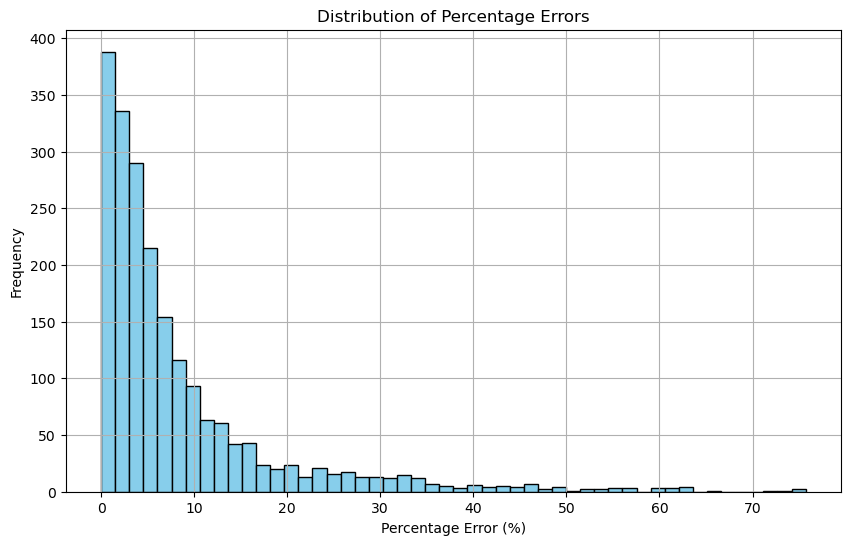


Feature Importance:
             importance    stddev       p_value  n  p99_high   p99_low
temperature    0.005131  0.000166  1.316034e-07  5  0.005473  0.004789
timestamp      0.005019  0.000123  4.318946e-08  5  0.005272  0.004766
wind_speed     0.000660  0.000010  5.865023e-09  5  0.000680  0.000640


<Figure size 1200x800 with 0 Axes>

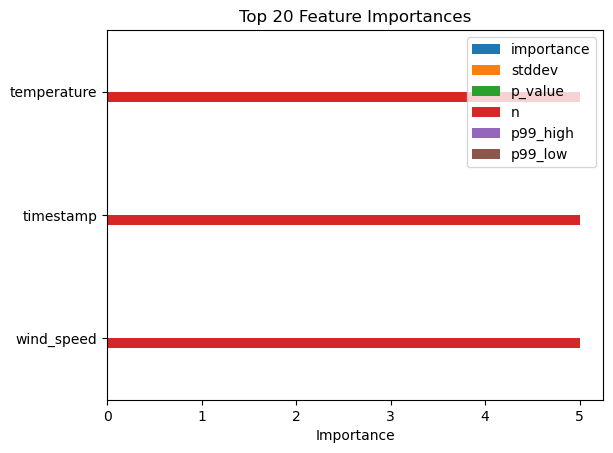

In [20]:
import numpy as np
# Reset index if needed
test_data = test_data.reset_index(drop=True)

# Compute SMAPE witch means Symmetric Mean Absolute Percentage Error
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    smape_values = np.where(denominator != 0, diff / denominator, 0)
    return np.mean(smape_values) * 100

# Replace 'target_column' with your actual target column name
y_true = test_data[target]
y_pred = predictor.predict(test_data)
smape_value = smape(y_true, y_pred)
print(f"\nSMAPE: {smape_value:.2f}%")

# Analyze percent-wise errors
percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
percentage_errors = np.where(y_true != 0, percentage_errors, 0)

mean_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)
max_percentage_error = np.max(percentage_errors)

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")
print(f"Max Percentage Error: {max_percentage_error:.2f}%")

# Plot percentage error distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')
plt.grid(True)
plt.show()

# Feature Importance
# global_importance = predictor.feature_importance(test_data)


Feature Importance:
             importance    stddev       p_value  p99_high   p99_low
temperature    0.005131  0.000166  1.316034e-07  0.005473  0.004789
timestamp      0.005019  0.000123  4.318946e-08  0.005272  0.004766
wind_speed     0.000660  0.000010  5.865023e-09  0.000680  0.000640


<Figure size 1200x800 with 0 Axes>

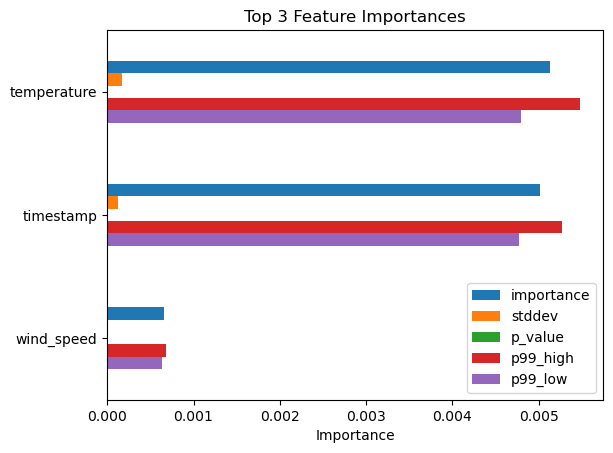

In [30]:
print("\nFeature Importance:")
print(global_importance)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
# remove the n from the golbal_importance plot
global_importance.columns
# Index(['importance'	'stddev'	'p_value'	'n'	'p99_high'	'p99_low']	dtype='object')

if 'n' in global_importance.columns:
    global_importance = global_importance.drop(columns=['n'])
global_importance.head(20).plot(kind='barh')

plt.xlabel('Importance')
plt.title('Top 3 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Optional: SHAP Values for advanced insights
# explainer = predictor.explain(test_data, model='best')
# explainer.plot_feature_importance()
